In [147]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm, tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

import keras

In [148]:
import tensorflow as tf

In [149]:
model_keras_final = keras.models.Sequential([
    keras.layers.Conv1D(64, kernel_size = 3, strides = 1, input_shape = (130, 1)), keras.layers.Activation('relu'),
    keras.layers.Conv1D(64, kernel_size = 3, strides = 1), keras.layers.Activation('relu'),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling1D(pool_size = 2, strides = 2),

    keras.layers.Conv1D(128, kernel_size = 3), keras.layers.Activation('relu'),
    keras.layers.Conv1D(128, kernel_size = 3), keras.layers.Activation('relu'),
    keras.layers.Conv1D(128, kernel_size = 3), keras.layers.Activation('relu'),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling1D(pool_size = 2, strides = 2),

    keras.layers.Conv1D(256, kernel_size = 3), keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(2), keras.layers.Activation('softmax')
])

c:\Users\ivvag\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [150]:
model_keras = keras.models.Sequential([
    keras.layers.Conv1D(512, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu',input_shape = (130,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size = 5, strides = 2, padding = 'same'),

    keras.layers.Conv1D(512, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size = 5, strides = 2, padding = 'same'),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(256, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size = 5, strides = 2, padding = 'same'),

    keras.layers.Conv1D(256, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size = 5, strides = 2, padding = 'same'),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(128, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size = 3, strides = 2, padding = 'same'),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax')
])

In [151]:
model_keras.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_108 (Conv1D)             │ (None, 130, 512)       │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 130, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_56 (MaxPooling1D) │ (None, 65, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_109 (Conv1D)             │ (None, 65, 512)        │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 65, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_57 (MaxPooling1D) │ (None, 33, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 33, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_110 (Conv1D)             │ (None, 33, 256)        │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 33, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_58 (MaxPooling1D) │ (None, 17, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_111 (Conv1D)             │ (None, 17, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 17, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_59 (MaxPooling1D) │ (None, 9, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 9, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_112 (Conv1D)             │ (None, 9, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 9, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_60 (MaxPooling1D) │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,090 (9.92 MB)

 Trainable params: 2,597,762 (9.91 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [152]:
model_keras_final.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_102 (Conv1D)             │ (None, 128, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_84 (Activation)      │ (None, 128, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_103 (Conv1D)             │ (None, 126, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_85 (Activation)      │ (None, 126, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 126, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_54 (MaxPooling1D) │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_104 (Conv1D)             │ (None, 61, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_86 (Activation)      │ (None, 61, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_105 (Conv1D)             │ (None, 59, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_87 (Activation)      │ (None, 59, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_106 (Conv1D)             │ (None, 57, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_88 (Activation)      │ (None, 57, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 57, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_55 (MaxPooling1D) │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_107 (Conv1D)             │ (None, 26, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_89 (Activation)      │ (None, 26, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 6656)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │        13,314 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_90 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,746 (967.76 KB)

 Trainable params: 247,746 (967.76 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
data = pd.read_csv('train_df_mel_crema_4_emo.csv')
data

,Unnamed: 0,annotator_emo,cent_mean,contrast,0,1,2,3,4,5,...,118,119,120,121,122,123,124,125,126,127
0,0,angry,1516.157973,20.522395,-341.988922,120.799965,-9.834449,39.606228,-2.239531,13.864772,...,0.231823,-0.226967,-0.337666,-0.452825,0.213867,-0.026829,0.492495,0.187238,0.855993,0.541407
1,1,angry,3684.502756,18.501309,-239.794383,52.480230,4.421712,18.387779,9.017918,1.393566,...,0.155041,0.031640,-0.511551,-0.049059,0.353396,0.304433,-0.141257,0.243775,0.318213,0.415352
2,2,angry,1551.680454,22.034705,-372.763550,120.855606,-15.439114,42.514465,-4.018615,15.699135,...,0.006481,-0.420476,-0.343315,-0.600181,0.474914,0.105315,0.106699,-0.136821,0.988460,0.469291
3,3,angry,1512.704310,20.726959,-341.397095,122.088974,-9.714931,40.210346,-2.286527,14.134884,...,0.270338,-0.231915,-0.372432,-0.450750,0.215239,-0.053451,0.461994,0.148280,0.837834,0.574637
4,4,angry,1629.472273,21.909956,-368.168549,114.008362,-10.998208,38.491581,-3.947737,11.404952,...,0.025129,0.194692,-0.148822,0.756450,0.173694,0.583209,-0.130687,-0.929948,-0.375823,-0.196187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22045,22045,sad,2474.197453,15.994451,-389.741791,99.573364,-1.938056,60.633686,-21.287954,38.698570,...,0.908502,-0.275093,0.131725,0.505332,0.943648,-0.188351,0.347837,0.582340,0.500925,-0.308574
22046,22046,sad,4492.822993,13.579176,-272.974747,27.152839,16.444229,21.122547,3.076308,12.080244,...,0.387154,0.228548,-0.046529,0.302899,0.216308,-0.006052,0.581251,0.733744,0.046665,-0.139442
22047,22047,sad,2520.852697,17.113073,-417.379364,92.543755,1.755019,56.391796,-18.225424,37.058105,...,0.602971,-0.039959,0.179056,0.685051,1.556407,-0.487420,0.558362,0.680108,0.424102,-0.317423
22048,22048,sad,2489.242546,15.551617,-388.164886,98.769165,-1.474197,59.575813,-20.592436,38.067837,...,0.924972,-0.204392,0.142809,0.431464,0.913113,-0.212405,0.370338,0.607417,0.479428,-0.301078


In [154]:
data = data.drop('Unnamed: 0', axis = 1)

In [155]:
data.dropna(axis='columns',how='any', inplace=True)
data.drop(index = data.index[data['annotator_emo'] == 'angry'], inplace = True)
data.drop(index = data.index[data['annotator_emo'] == 'neutral'], inplace = True)
data

,annotator_emo,cent_mean,contrast,0,1,2,3,4,5,6,...,118,119,120,121,122,123,124,125,126,127
5,happy,1481.793207,19.720976,-337.839569,120.109604,-12.691747,39.687584,4.412653,10.073730,-21.633322,...,0.029733,-0.414386,0.111633,-0.088698,0.778561,0.462837,-0.147732,0.091844,0.981873,0.052002
6,happy,3222.198190,19.617029,-271.344223,66.862091,4.889426,24.762232,10.425744,1.674847,-11.178079,...,0.020322,-0.115580,0.221460,0.174833,0.373390,0.580769,-0.399061,0.602163,0.842092,-0.165212
7,happy,1501.780497,20.373283,-369.431549,120.493996,-16.927330,40.966946,2.300753,11.385517,-22.479256,...,0.341491,-0.442146,0.055761,-0.126033,0.741934,0.635486,-0.037820,0.497463,1.075289,-0.079323
8,happy,1479.136708,19.550562,-338.433685,120.952332,-13.467862,40.169106,3.945381,10.452501,-22.034424,...,0.030906,-0.417668,0.112600,-0.098850,0.811956,0.483639,-0.155348,0.113089,0.998071,0.028251
9,happy,1507.353989,21.064289,-360.916748,115.934212,-9.970994,38.446541,3.111881,5.056532,-22.320711,...,0.480275,0.964756,0.497003,0.887790,-0.041259,-0.405184,-0.202320,0.075798,-0.346170,-0.215229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22045,sad,2474.197453,15.994451,-389.741791,99.573364,-1.938056,60.633686,-21.287954,38.698570,-28.393320,...,0.908502,-0.275093,0.131725,0.505332,0.943648,-0.188351,0.347837,0.582340,0.500925,-0.308574
22046,sad,4492.822993,13.579176,-272.974747,27.152839,16.444229,21.122547,3.076308,12.080244,-6.293390,...,0.387154,0.228548,-0.046529,0.302899,0.216308,-0.006052,0.581251,0.733744,0.046665,-0.139442
22047,sad,2520.852697,17.113073,-417.379364,92.543755,1.755019,56.391796,-18.225424,37.058105,-26.737177,...,0.602971,-0.039959,0.179056,0.685051,1.556407,-0.487420,0.558362,0.680108,0.424102,-0.317423
22048,sad,2489.242546,15.551617,-388.164886,98.769165,-1.474197,59.575813,-20.592436,38.067837,-27.835958,...,0.924972,-0.204392,0.142809,0.431464,0.913113,-0.212405,0.370338,0.607417,0.479428,-0.301078


In [156]:
data = data.sample(frac = 1)
data

,annotator_emo,cent_mean,contrast,0,1,2,3,4,5,6,...,118,119,120,121,122,123,124,125,126,127
12911,sad,2849.852800,13.532202,-334.115406,76.111637,33.968710,27.833695,14.142354,1.498556,-3.632114,...,0.053905,0.096583,0.173877,0.422719,0.305274,0.295803,0.403384,0.200458,0.204285,0.064573
15200,sad,1116.698831,12.259613,-429.220795,151.682175,11.009135,52.244095,-18.936405,24.241987,-13.352525,...,0.646991,-0.087818,-0.783643,0.487795,0.402808,-0.310989,-0.186957,0.045436,-0.203178,-0.411522
11010,happy,1325.467213,13.398141,-347.877747,117.331726,8.390826,46.167248,6.870920,5.126441,-17.204412,...,0.156817,-0.034484,-0.747547,0.451844,0.418954,-0.017926,-0.337533,-0.002512,0.517832,-0.029908
8223,sad,1098.597240,15.604806,-437.404053,146.541931,15.601092,60.524212,-12.345641,19.625698,-13.737233,...,-0.264494,-0.163563,0.590281,0.786460,0.083396,0.684959,0.077843,-0.471655,-0.616250,-0.213645
4533,happy,1587.839524,15.086432,-298.789429,134.480957,-2.652380,40.137390,-25.106808,4.107717,-20.700697,...,0.494079,0.737976,-0.521693,-0.028953,0.232395,-0.436041,-0.167890,1.246220,0.463737,-0.082564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10653,sad,1141.181070,13.320792,-453.163177,145.005188,20.821953,61.610809,-15.811339,28.788548,-16.127565,...,0.052017,0.392917,-0.207438,-0.213180,0.202640,0.295809,-0.149046,-0.469556,-0.486794,0.512410
20986,sad,3459.528336,12.944049,-338.744347,59.300391,35.839975,21.923051,11.579382,10.168227,0.161960,...,0.452391,0.650318,0.007483,0.154331,0.170665,0.542399,0.516727,0.288936,0.389187,0.523041
14530,sad,1232.519770,13.269651,-427.927399,139.049850,8.159778,60.454315,-11.761570,19.689335,-14.774226,...,0.327444,-0.462450,-0.232218,0.280237,-0.306481,0.007187,-0.109311,-0.003818,-0.908468,0.050746
2661,happy,3243.442388,13.174401,-341.527794,61.019165,33.579935,35.246227,20.290883,5.369450,1.338362,...,-0.290978,0.081228,0.278580,0.096846,0.114165,0.267448,-0.089932,0.250881,0.443421,-0.331833


In [157]:
labels = pd.DataFrame(data['annotator_emo'])

#labels.loc[labels['annotator_emo'] == 'angry', labels.columns == 'annotator_emo'] = int(1)
#labels.loc[labels['annotator_emo'] == 'happy', labels.columns == 'annotator_emo'] = int(2)
#labels.loc[labels['annotator_emo'] == 'sad', labels.columns == 'annotator_emo'] = int(3)
#labels.loc[labels['annotator_emo'] == 'neutral', labels.columns == 'annotator_emo'] = int(4)
encoder = OneHotEncoder()
labels = encoder.fit_transform(np.array(labels).reshape(-1, 1)).toarray()

labels

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [158]:
data = data.drop('annotator_emo', axis = 1)
data

,cent_mean,contrast,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
12911,2849.852800,13.532202,-334.115406,76.111637,33.968710,27.833695,14.142354,1.498556,-3.632114,-2.507207,...,0.053905,0.096583,0.173877,0.422719,0.305274,0.295803,0.403384,0.200458,0.204285,0.064573
15200,1116.698831,12.259613,-429.220795,151.682175,11.009135,52.244095,-18.936405,24.241987,-13.352525,14.476744,...,0.646991,-0.087818,-0.783643,0.487795,0.402808,-0.310989,-0.186957,0.045436,-0.203178,-0.411522
11010,1325.467213,13.398141,-347.877747,117.331726,8.390826,46.167248,6.870920,5.126441,-17.204412,-3.929268,...,0.156817,-0.034484,-0.747547,0.451844,0.418954,-0.017926,-0.337533,-0.002512,0.517832,-0.029908
8223,1098.597240,15.604806,-437.404053,146.541931,15.601092,60.524212,-12.345641,19.625698,-13.737233,10.923338,...,-0.264494,-0.163563,0.590281,0.786460,0.083396,0.684959,0.077843,-0.471655,-0.616250,-0.213645
4533,1587.839524,15.086432,-298.789429,134.480957,-2.652380,40.137390,-25.106808,4.107717,-20.700697,7.312603,...,0.494079,0.737976,-0.521693,-0.028953,0.232395,-0.436041,-0.167890,1.246220,0.463737,-0.082564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10653,1141.181070,13.320792,-453.163177,145.005188,20.821953,61.610809,-15.811339,28.788548,-16.127565,13.460648,...,0.052017,0.392917,-0.207438,-0.213180,0.202640,0.295809,-0.149046,-0.469556,-0.486794,0.512410
20986,3459.528336,12.944049,-338.744347,59.300391,35.839975,21.923051,11.579382,10.168227,0.161960,0.870043,...,0.452391,0.650318,0.007483,0.154331,0.170665,0.542399,0.516727,0.288936,0.389187,0.523041
14530,1232.519770,13.269651,-427.927399,139.049850,8.159778,60.454315,-11.761570,19.689335,-14.774226,14.025971,...,0.327444,-0.462450,-0.232218,0.280237,-0.306481,0.007187,-0.109311,-0.003818,-0.908468,0.050746
2661,3243.442388,13.174401,-341.527794,61.019165,33.579935,35.246227,20.290883,5.369450,1.338362,1.223775,...,-0.290978,0.081228,0.278580,0.096846,0.114165,0.267448,-0.089932,0.250881,0.443421,-0.331833


In [159]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size = 0.2, random_state = 42)

In [160]:
#y_train = pd.get_dummies(y_train)
#y_val = pd.get_dummies(y_val)

y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [161]:
len(X_val)

2288

In [162]:
X_train = X_train[:9088]
y_train = y_train[:9088]

X_val = X_val[:2176]
y_val = y_val[:2176]

In [163]:
model_keras.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnnhistory = model_keras.fit(X_train, y_train, batch_size = 128, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 45s 543ms/step - accuracy: 0.7439 - loss: 0.6770 - val_accuracy: 0.4940 - val_loss: 4.0082
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 38s 537ms/step - accuracy: 0.8386 - loss: 0.3899 - val_accuracy: 0.5873 - val_loss: 1.0353
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 38s 535ms/step - accuracy: 0.8483 - loss: 0.3643 - val_accuracy: 0.8139 - val_loss: 0.4122
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 545ms/step - accuracy: 0.8610 - loss: 0.3358 - val_accuracy: 0.8120 - val_loss: 0.3924
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 547ms/step - accuracy: 0.8648 - loss: 0.3263 - val_accuracy: 0.8828 - val_loss: 0.2976
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 555ms/step - accuracy: 0.8614 - loss: 0.3261 - val_accuracy: 0.8663 - val_loss: 0.3302
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 565ms/step - accuracy: 0.8832 - loss: 0.2900 - val_accuracy: 0.8920 - val_loss: 0.2941
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 575ms/step - accuracy: 0.8840 - loss: 0.2820 - val_accu

In [164]:
model_keras.save('emotions_detection_model.keras')

In [165]:
data_test = pd.read_csv('test_df_mel_crema_4_emo.csv')
data_test

,Unnamed: 0,annotator_emo,cent_mean,contrast,0,1,2,3,4,5,...,118,119,120,121,122,123,124,125,126,127
0,0,angry,2472.847961,14.241989,-275.23938,101.215950,-34.016770,52.698610,-44.100845,26.928722,...,0.243881,-0.718376,-0.335948,0.154708,0.906317,-0.726911,0.475571,0.407141,0.256284,-0.598075
1,1,happy,2156.810964,14.642920,-340.00192,95.977540,-3.583700,42.040997,-19.488024,21.802261,...,0.638875,-0.122775,-0.115199,0.411241,1.106217,-0.292577,0.407267,0.497420,-0.144302,-0.111706
2,2,neutral,2206.811603,15.619951,-353.81247,109.763270,-10.673989,48.002956,-27.736183,27.025438,...,0.277714,0.119727,0.188621,-0.208024,0.498538,0.213306,0.714227,0.501599,0.273118,-0.251394
3,3,sad,1888.200984,16.350515,-400.64008,115.514060,1.005786,46.174850,-19.330326,27.948610,...,0.536363,-0.024323,-0.303838,-0.053530,0.765132,-0.262143,0.362664,0.743397,-0.087733,-0.108066
4,4,angry,1705.885932,18.085604,-392.15020,117.372375,-2.774597,53.632600,-5.634442,28.831650,...,0.502452,-0.125927,0.095584,0.046697,0.410967,0.692762,0.585200,0.042970,0.433894,0.026434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485,sad,1828.912505,15.287681,-463.23490,119.296165,12.644127,64.244385,-10.710855,43.234486,...,0.673229,0.012769,0.308201,0.346346,0.487118,0.451848,0.405281,0.156729,0.537178,-0.110614
486,486,angry,1719.846539,17.538369,-401.31766,120.610170,10.229724,47.552270,-17.442976,32.306960,...,0.392730,0.004857,0.458712,-0.001478,0.700354,0.762543,0.206134,0.306388,0.348036,-0.167088
487,487,happy,1704.955902,15.851763,-410.91720,124.266685,8.617777,52.535904,-10.971675,30.253729,...,0.135753,0.241516,-0.343156,-0.550017,0.570498,0.270303,0.176169,0.455581,0.985140,0.085190
488,488,neutral,1667.725824,15.971654,-429.45510,122.096790,19.652607,45.077877,-13.957479,31.799103,...,0.324537,-0.749429,0.333485,0.022898,0.445822,0.751626,-0.088814,0.365234,0.090403,-0.055620


In [166]:
data_test.drop('Unnamed: 0', axis = 1, inplace = True)
data_test.drop(index = data_test.index[data_test['annotator_emo'] == 'angry'], inplace = True)
data_test.drop(index = data_test.index[data_test['annotator_emo'] == 'neutral'], inplace = True)
data_test

,annotator_emo,cent_mean,contrast,0,1,2,3,4,5,6,...,118,119,120,121,122,123,124,125,126,127
1,happy,2156.810964,14.642920,-340.00192,95.977540,-3.583700,42.040997,-19.488024,21.802261,-9.862809,...,0.638875,-0.122775,-0.115199,0.411241,1.106217,-0.292577,0.407267,0.497420,-0.144302,-0.111706
3,sad,1888.200984,16.350515,-400.64008,115.514060,1.005786,46.174850,-19.330326,27.948610,-12.831261,...,0.536363,-0.024323,-0.303838,-0.053530,0.765132,-0.262143,0.362664,0.743397,-0.087733,-0.108066
5,happy,1308.873738,17.656005,-468.10895,122.763930,18.623346,52.173733,5.167877,30.014698,-16.307648,...,0.237060,0.050559,0.141987,0.446912,0.686374,0.874700,0.206040,0.352912,0.237481,0.147294
7,sad,1420.602340,16.020800,-499.74716,128.438280,15.246982,63.944637,-6.491027,41.105236,-21.103662,...,0.283577,0.229237,0.514158,0.295326,0.708871,0.371044,0.350668,0.231561,0.495338,0.206621
11,happy,1965.468688,19.830868,-240.21448,105.731870,-28.488369,36.805520,-19.914347,33.199590,-28.065523,...,0.431355,-0.073958,0.012882,0.321994,0.331620,-0.297224,1.255367,0.083878,-0.080679,-0.328462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,sad,1569.785023,16.704780,-450.34710,128.249800,4.072793,62.343780,-9.624244,38.784590,-21.299133,...,0.088179,0.180672,0.119887,-0.557524,0.928088,0.360287,0.258642,0.079079,0.273829,0.029654
483,happy,1828.659370,14.526070,-432.93380,112.472890,16.785313,53.254353,-8.163450,33.631203,-20.025960,...,0.376037,0.059294,0.218948,0.572774,0.707912,0.211904,0.042223,0.603623,0.593815,-0.422171
485,sad,1828.912505,15.287681,-463.23490,119.296165,12.644127,64.244385,-10.710855,43.234486,-22.745628,...,0.673229,0.012769,0.308201,0.346346,0.487118,0.451848,0.405281,0.156729,0.537178,-0.110614
487,happy,1704.955902,15.851763,-410.91720,124.266685,8.617777,52.535904,-10.971675,30.253729,-19.481155,...,0.135753,0.241516,-0.343156,-0.550017,0.570498,0.270303,0.176169,0.455581,0.985140,0.085190


In [167]:
y_test = pd.DataFrame(data_test['annotator_emo'])
#y_test = pd.get_dummies(y_test)

X_test = data_test
X_test.drop('annotator_emo', axis = 1, inplace = True)
X_test

,cent_mean,contrast,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
1,2156.810964,14.642920,-340.00192,95.977540,-3.583700,42.040997,-19.488024,21.802261,-9.862809,2.927218,...,0.638875,-0.122775,-0.115199,0.411241,1.106217,-0.292577,0.407267,0.497420,-0.144302,-0.111706
3,1888.200984,16.350515,-400.64008,115.514060,1.005786,46.174850,-19.330326,27.948610,-12.831261,6.530136,...,0.536363,-0.024323,-0.303838,-0.053530,0.765132,-0.262143,0.362664,0.743397,-0.087733,-0.108066
5,1308.873738,17.656005,-468.10895,122.763930,18.623346,52.173733,5.167877,30.014698,-16.307648,1.633355,...,0.237060,0.050559,0.141987,0.446912,0.686374,0.874700,0.206040,0.352912,0.237481,0.147294
7,1420.602340,16.020800,-499.74716,128.438280,15.246982,63.944637,-6.491027,41.105236,-21.103662,10.570390,...,0.283577,0.229237,0.514158,0.295326,0.708871,0.371044,0.350668,0.231561,0.495338,0.206621
11,1965.468688,19.830868,-240.21448,105.731870,-28.488369,36.805520,-19.914347,33.199590,-28.065523,4.117559,...,0.431355,-0.073958,0.012882,0.321994,0.331620,-0.297224,1.255367,0.083878,-0.080679,-0.328462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,1569.785023,16.704780,-450.34710,128.249800,4.072793,62.343780,-9.624244,38.784590,-21.299133,16.448528,...,0.088179,0.180672,0.119887,-0.557524,0.928088,0.360287,0.258642,0.079079,0.273829,0.029654
483,1828.659370,14.526070,-432.93380,112.472890,16.785313,53.254353,-8.163450,33.631203,-20.025960,14.012293,...,0.376037,0.059294,0.218948,0.572774,0.707912,0.211904,0.042223,0.603623,0.593815,-0.422171
485,1828.912505,15.287681,-463.23490,119.296165,12.644127,64.244385,-10.710855,43.234486,-22.745628,18.672950,...,0.673229,0.012769,0.308201,0.346346,0.487118,0.451848,0.405281,0.156729,0.537178,-0.110614
487,1704.955902,15.851763,-410.91720,124.266685,8.617777,52.535904,-10.971675,30.253729,-19.481155,12.302867,...,0.135753,0.241516,-0.343156,-0.550017,0.570498,0.270303,0.176169,0.455581,0.985140,0.085190


In [168]:
y_test = np.array(y_test)
len(y_test)

254

In [169]:
y_preds = model_keras.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


In [170]:
y_preds = encoder.inverse_transform(y_preds)

In [171]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_preds.flatten()
df['Actual Labels'] = y_test.flatten()

df

,Predicted Labels,Actual Labels
0,happy,happy
1,sad,sad
2,sad,happy
3,sad,sad
4,happy,happy
...,...,...
249,sad,sad
250,sad,happy
251,sad,sad
252,sad,happy


In [172]:
acc = accuracy_score(y_test, y_preds)
print('Точность на тестовых данных: {0}'.format(acc))

Точность на тестовых данных: 0.5905511811023622


In [141]:
y_preds_val = model_keras_final.predict(X_val)
y_true = encoder.inverse_transform(y_val)
y_preds_val = encoder.inverse_transform(y_preds_val)

acc = accuracy_score(y_true, y_preds_val)
print('Точность на тестовых данных: {0}'.format(acc))

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Точность на тестовых данных: 0.9457720588235294


In [142]:
cnnhistory.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [143]:
import matplotlib
import matplotlib.pyplot as plt

In [144]:
plt.style.use('ggplot')

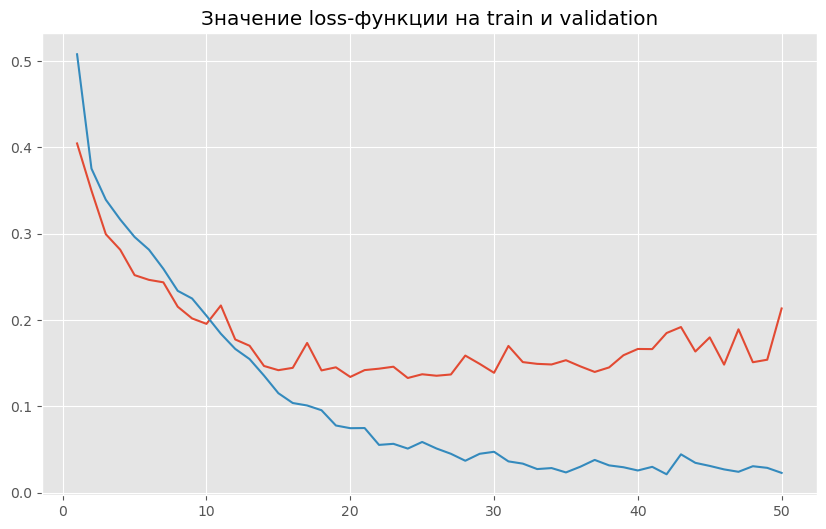

In [145]:
x = np.linspace(1, 50, 50)
val_loss = cnnhistory.history['val_loss']
train_loss = cnnhistory.history['loss']

fig = plt.figure(figsize = (10, 6))
plt.plot(x, val_loss)
plt.plot(x, train_loss)
plt.title('Значение loss-функции на train и validation')
plt.show()

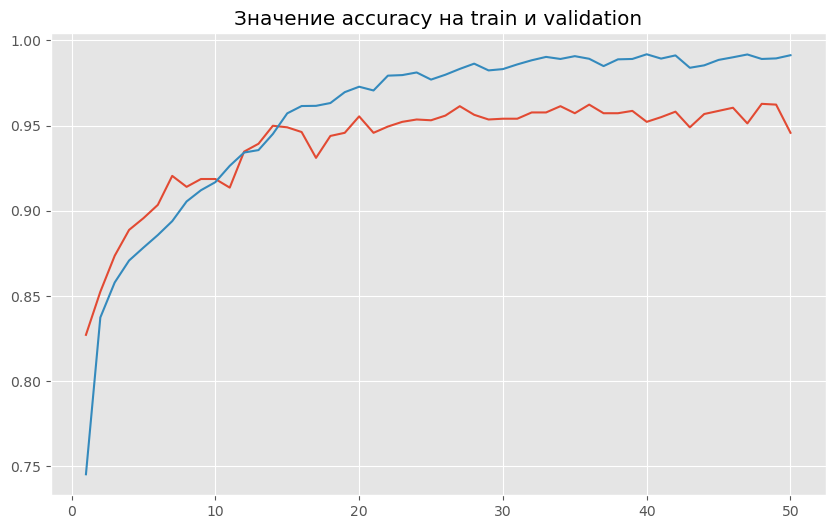

In [146]:
train_acc = cnnhistory.history['accuracy']
val_acc = cnnhistory.history['val_accuracy']

fig = plt.figure(figsize = (10, 6))
plt.plot(x, val_acc)
plt.plot(x, train_acc)
plt.title('Значение accuracy на train и validation')
plt.show()